<a href="https://colab.research.google.com/github/ayportella/05-sql/blob/main/31_filters_and_condicional_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | SQL: Filtrando & Seleção Condicional
Caderno de **Exercícios**<br> 
Professor [Mariane Neiva](https://www.linkedin.com/in/mariane-neiva/)

---

# **Tópicos**

<ol type="1">
  <li>Filtros and, or, in e between;</li>
  <li>Filtros like e wildcards;</li>
  <li>Seleção condicional;</li>
</ol>

---

# **Instruções**

Nessa **atividades**, você deve:

 1. Executar a consulta SQL fornecida;
 2. Exportar os resultados em um arquivo csv para sua máquina; 
 3. Renomear o arquivo como **query\<numero-da-query\>.csv**;
 4. Enviar para a avaliação do tutor na plataforma da EBAC.

> **Atenção**: Substitua o **\<numero-da-query>** numero da consulta, exemplo: **query1.csv**.

**Importante**: Para consultar mais detalhes da AWS Athena [clique aqui](https://docs.aws.amazon.com/athena/latest/ug/what-is.html)

---

# Atividades

#1. Prática 1

> **Não há necessidade de entrega**. 
Para esses exercícios, utilizaremos os mesmo dados do módulo 3.

Caso você não tenha as informações de **transacoes.csv**, elas estarão disponíveis no material de aula.

Siga os seguintes passos para criação da tabela (desconsidere caso você já tenha os dados no seu S3):

* Crie uma pasta bucket-transacoes no seu S3 e carregue o arquivo **transacoes.csv**
* Volta para o AWS Athena e execute o seguinte comando:

```sql
CREATE EXTERNAL TABLE transacoes(
id_cliente BIGINT,
id_transacao BIGINT,
valor FLOAT,
id_loja STRING)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.OpenCSVSerde'
WITH SERDEPROPERTIES ('separatorChar' = ',', 'quoteChar' = '"', 'escapeChar' = '\\')
STORED AS TEXTFILE
LOCATION 's3://bucket-transacoes/'
```

Utilizaremos a tabela para os exercícios seguintes.

# **2. Selecionando dados**

Vamos testar os comandos and, or, in e between?! Execute as queries e salve o resultado para enviar os exercícios.   

##2.1 Query 1 

```sql 
SELECT *
FROM transacoes
WHERE valor > 30 AND id_loja = 'magalu';
```

> **Importante**: entregue os resultados da query com o nome *query1.csv*

##2.2 Query 2 

```sql 
SELECT *
FROM transacoes
WHERE valor > 30 OR id_loja = 'magalu';
```

> **Importante**: entregue os resultados da query com o nome *query2.csv*

##2.3 Query 3

```sql 
SELECT *
FROM transacoes
WHERE id_loja IN ('magalu','subway') AND valor > 10;
```

> **Importante**: entregue os resultados da query com o nome *query3.csv*

##2.4 Query 4

```sql 
SELECT *
FROM transacoes
WHERE valor BETWEEN 60.0 AND 1000.0;
```

> **Importante**: entregue os resultados da query com o nome *query4.csv*

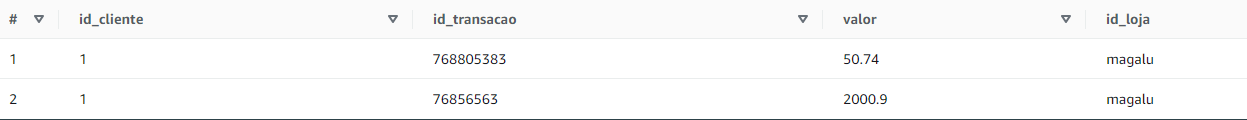

Resultado do Query 1 acima, com seleção condicional de valores maiores que 30 e id_loja correspoda a Magalu.

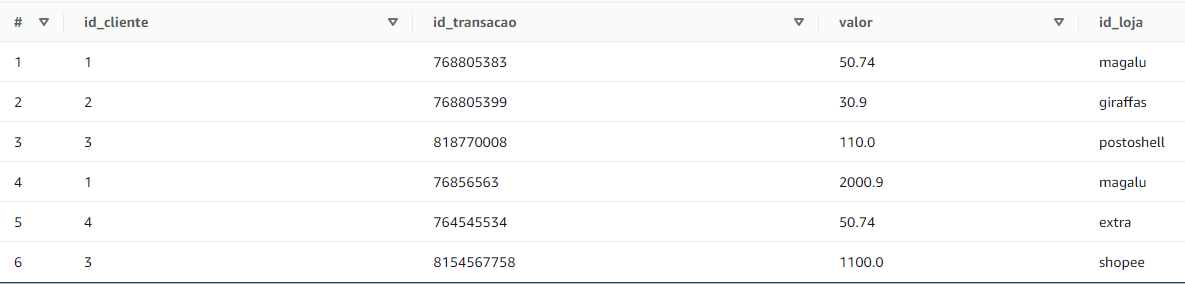

Resultado do Query 2 acima, com seleção condicional de valores maiores que 30 ou id_loja corresponda a Magalu.

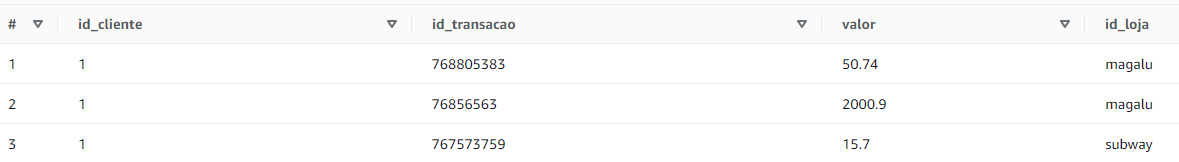

Resultado do Query 3 acima, com seleção condicional escolhendo entre os id_loja correspondendo a 'magalu' ou 'subway' e com valores de transações maiores que 10.

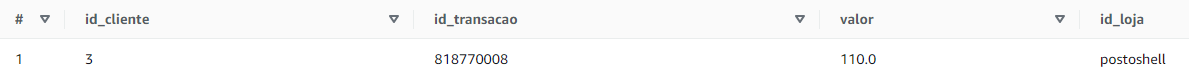

Resultado do Query 4 acima, em que valores de transações devem estar entre 60 a 100.

# **3. Filtro like e wildcards**

Agora é hora de trabalhar com padrões! Execute as queries e salve o resultado para enviar os exercícios.   

##3.1 Query 5 

```sql 
SELECT * 
FROM transacoes 
WHERE id_loja LIKE 'mag%'
```

> **Importante**: entregue os resultados da query com o nome *query5.csv*

##3.2 Query 6

```sql 
SELECT * 
FROM transacoes 
WHERE id_loja LIKE '%sh%'
```

> **Importante**: entregue os resultados da query com o nome *query6.csv*



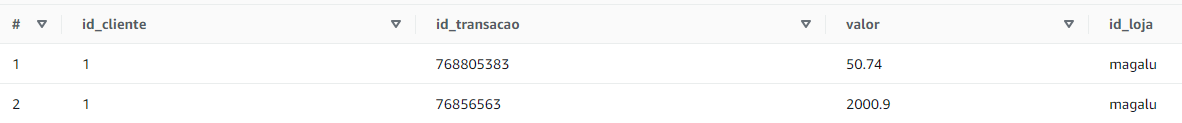

Resultado da Query 5 acima, em que o filtro corresponde aos resultados com id_loja = magalu.

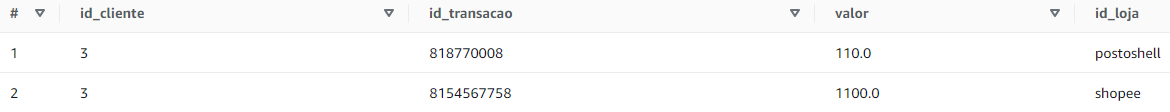

Resultado da Query 6 acima, em que o filtro procura '%sh%' para id_loja, e 2 correspondências são encontradas: postoshell e shopee.

# **4. Seleção condicional**

Chegou a hora de testar a combinação do CASE com o SELECT! Execute a  query e salve o resultado para enviar o  exercício.   

##4.1 Query 7 

```sql 
SELECT id_cliente, id_loja, valor,
CASE
    WHEN valor > 1000 THEN 'Compra com alto valor'
    WHEN valor < 1000 THEN 'Compra com baixo valor'
END 
AS classeValor, 
CASE
    WHEN id_loja IN ('giraffas','subway')  THEN 'alimentacao'
    WHEN id_loja IN ('magalu','extra') THEN 'variedade'
    WHEN id_loja IN ('postoshell','seveneleven') THEN '24horas'
    ELSE 'outros'
END 
AS tipo_compra
FROM transacoes;
```

> **Importante**: entregue os resultados da query com o nome *query7.csv*



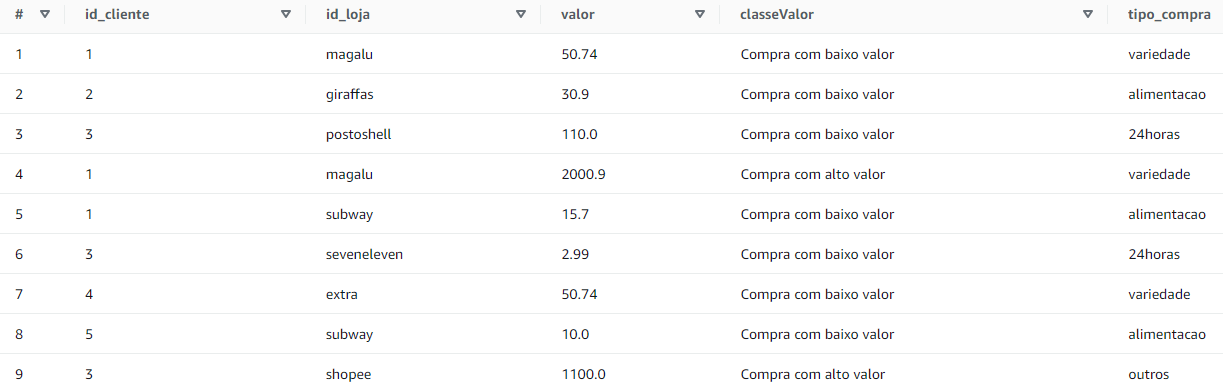

O primeiro CASE cria uma nova coluna chamada de classeValor, correspondendo com o valor das transações, caso sejam maiores ou menores que 1000, com compras com alto valor ou baixo valor.

O segundo CASE cria uma outra coluna chamada de tipo_compra, que relaciona o id_loja com resultados considerados como 'variedade', ' alimentação', '24 horas' ou 'outros'.